In [7]:
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [8]:
perceptron_dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
perceptron_dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
perceptron_train = perceptron_dup_train.drop_duplicates(subset=['User', 'Timestamp'])
perceptron_unique_test = perceptron_dup_test.drop_duplicates(subset=['User', 'Timestamp'])

perceptron_test = perceptron_unique_test.iloc[sample(range(len(perceptron_unique_test)), 40), :]

print ('(#row,#column) of train dataset' , perceptron_train.shape)
print ('(#row,#column) of test dataset' , perceptron_test.shape)

('(#row,#column) of train dataset', (406, 46))
('(#row,#column) of test dataset', (40, 46))


In [13]:
X_train = perceptron_train.values[:, 2:45]
y_train = perceptron_train.values[:, 45]
X_test = perceptron_test.values[:, 2:45]
y_test = perceptron_test.values[:, 45]

In [16]:
ppn = Perceptron(max_iter=60, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

In [17]:
print('Accuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

Accuracy of Accuracy Score : 0.90


In [18]:
print('Accuracy of Perceptron Score: %.2f' % ppn.score(X_test,y_test))

Accuracy of Perceptron Score: 0.90


In [145]:
print ('Important features (featureName, weigh of important, #column)')
header = list(perceptron_train.head(1))
important_feature = []
for i in range(0,len(ppn.coef_[0])):
    important_feature.append((header[i+2],ppn.coef_[0][i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('AvgAcc-y', 63.238555430296685, 39)
('TimeDiffPeaks-z', 34.37562595112005, 34)
('TimeDiffPeaks-y', 32.096648650960077, 33)
('AvgAcc-x', 30.862084552577592, 38)
('Bin6,x', 2.55751725920795, 7)
('Bin10,y', 0.79616310410984481, 21)
('Bin9,y', 0.77619459548402769, 20)
('Bin5,x', 0.6808187075969786, 6)
('Bin2,z', 0.48903571614583524, 23)
('Bin9,z', 0.40163576695633663, 30)
('Bin8,z', 0.3057784674259823, 29)
('Bin8,y', 0.19532011544440228, 19)
('Bin7,x', 0.12179294448553737, 8)
('Bin1,z', -0.15521857947935661, 22)
('Bin10,z', -0.15561003075881905, 31)
('Bin1,x', -0.2819199399320706, 2)
('Bin3,z', -0.43410015391842299, 24)
('Bin1,y', -0.7155098821310184, 12)
('Bin2,x', -1.3221235993863174, 3)
('Bin5,y', -1.3637236812724065, 16)
('Bin4,x', -1.3987556129778644, 5)
('Bin7,y', -1.4560027520356247, 18)
('Bin7,z', -1.6826383079090719, 28)
('Bin10,x', -1.940744461639176, 11)
('Bin4,y', -2.1043307055468947, 15)
('Bin3,x', -2.3042008063580

In [123]:
perceptron_train['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_train['Label']])
my_color_map = ListedColormap(['skyblue','coral'],'mycolormap')
perceptron_test['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_test['Label']])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


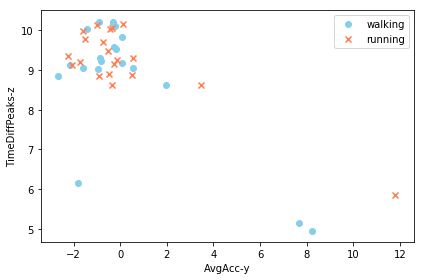

In [151]:
y = perceptron_test.iloc[:, 45].values
y = np.where(y == 'walking', -1, 1) 
X = perceptron_test.iloc[:, [38, 40]].values
plt.scatter(X[:len(perceptron_test)/2, 0], X[:len(perceptron_test)/2, 1],
           color='skyblue', marker='o', label='walking')
plt.scatter(X[len(perceptron_test)/2:len(perceptron_test), 0], X[len(perceptron_test)/2:len(perceptron_test), 1],
            color='coral', marker='x', label='running')

plt.xlabel('%s'%first_imp_fea[0])
plt.ylabel('%s'%second_imp_fea[0])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [184]:
#walking and running data points for training set(3 people data)
plt.subplot(2,1,1)
walk_points = perceptron_train.loc[perceptron_train['Label'] == 'walking']
run_points = perceptron_train.loc[perceptron_train['Label'] == 'running']
plt.scatter(walk_points['AvgAcc-x'],walk_points['AvgAcc-y'],color='skyblue'
            ,marker='o',edgecolors=None)
plt.scatter(run_points['AvgAcc-x'],run_points['AvgAcc-y'],color='coral'
            ,marker='x',edgecolors=None)
plt.title("(AvgAcc-x,AvgAcc-y)-3 people")
plt.legend(loc='upper right')

#walking and running data points for test set(10 people data)
plt.subplot(2,1,2)
walk_points_test = perceptron_unique_test.loc[perceptron_unique_test['Label'] == 'walking']
run_points_test = perceptron_unique_test.loc[perceptron_unique_test['Label'] == 'running']
plt.scatter(walk_points_test['AvgAcc-x'],walk_points_test['AvgAcc-y'],color='skyblue'
            ,marker='o',edgecolors=None)
plt.scatter(run_points_test['AvgAcc-x'],run_points_test['AvgAcc-y'],color='coral'
            ,marker='x',edgecolors=None)
plt.title("(AvgAcc-x,AvgAcc-y)-10 people")

plt.subplots_adjust(hspace=0.5)
# plt.show() 
plt.savefig('./image/scatter_pc_train_3_val_10.png',dpi=1000)

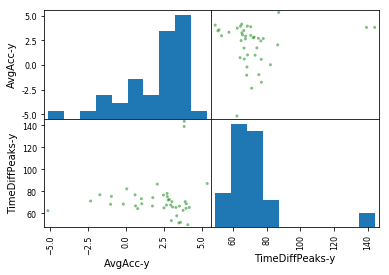

In [153]:
frame = perceptron_test.loc[:,['AvgAcc-y','TimeDiffPeaks-y']]
test=scatter_matrix(frame,color='g')
plt.show()

Confusion matrix, without normalization
[[ 9  3]
 [ 0 28]]
Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.    1.  ]]


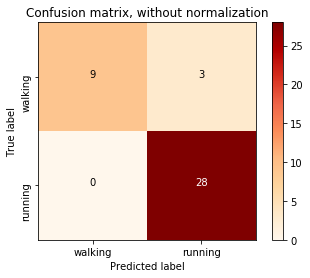

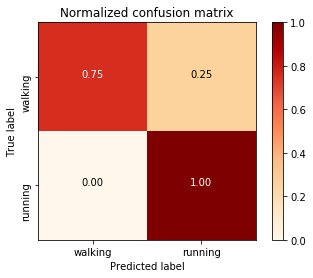

In [163]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.OrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr', dpi=1000)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('./image/cm_pc_normalized', dpi=1000)
plt.show()

In [31]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


def plot_roc_curve(Y_predict_gini,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict_gini)):
        if Y_predict_gini[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('./image/Area_under_roc_pc.png', dpi=1000)
    
plot_roc_curve(y_pred,y_test,"Area_under_roc_pc")